In [1]:
#Analise utilisando Regreção para encontrar o preço de casas.
#Os dados foram coletados via API, disponibilizada pelo Kaggle
#No primeiro projeto irei utilizarsomente as variáveis numéricas e os campos nulos será convertidos para -1
#A avaliação do modelos sera feita por Mean Squared Error (Erro Médio Quadrático) é uma medida comum para avaliação de um modelo de regressão
#Podemos dizer que o modelo que melhor alcançou um resultado foi o modelo do Projeto 1, utilizando Random Forest, obtendo o resultade de 1095681130.59


# Importando a Base de Dados por API

In [2]:
from google.colab import files
import numpy as np


In [3]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danilodemenezes","key":"c3a288653697920f2e33312661e6df7f"}'}

In [4]:
pip install kaggle -q

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          10661        197  1.0              
arnavvvvv/spotify-music                                      Top Spotify Songs                                   47KB  2024-03-06 05:20:29           2163         42  1.0              
yaminh/smartphone-sale-dataset                               Smartphones Sales Dataset                           65KB  2024-03-03 16:48:27           2461         35  0.88235295       
tarunrm09/climate-change-indicators                          Climate change Indi

In [9]:
%cd /content/

!kaggle competitions download -c house-prices-advanced-regression-techniques

/content
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 77.2MB/s]


In [10]:
!unzip house-prices-advanced-regression-techniques.zip -d houseprices

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: houseprices/data_description.txt  
  inflating: houseprices/sample_submission.csv  
  inflating: houseprices/test.csv    
  inflating: houseprices/train.csv   


##Dicionário de dados
Aqui está uma versão resumida do que você encontrará no arquivo de descrição de dados.

SalePrice - preço de venda do imóvel em dólares. Esta é a variável alvo que você está tentando prever.
MSSubClass : A classe de construção
MSZoning : A classificação geral de zoneamento
LotFrontage : Pés lineares de rua conectada à propriedade
LotArea : Tamanho do lote em pés quadrados
Rua : Tipo de acesso rodoviário
Beco : Tipo de beco de acesso
LotShape : Forma geral da propriedade
LandContour : Planicidade da propriedade
Utilitários : Tipo de utilitários disponíveis
LotConfig : configuração do lote
LandSlope : Inclinação da propriedade
Bairro : Locais físicos dentro dos limites da cidade de Ames
Condição1 : Proximidade da estrada principal ou ferrovia
Condição2 : Proximidade da estrada principal ou ferrovia (se uma segunda estiver presente)
BldgType : Tipo de moradia
HouseStyle : estilo de moradia
GlobalQual : Material geral e qualidade de acabamento
OverCond : Classificação geral da condição
Ano de construção : Data original de construção
YearRemodAdd : Data da remodelação
RoofStyle : Tipo de telhado
RoofMatl : Material do telhado
Exterior1st : Cobertura exterior da casa
Exterior2 : Cobertura exterior da casa (se houver mais de um material)
MasVnrType : tipo de folheado de alvenaria
MasVnrArea : Área folheada de alvenaria em pés quadrados
ExterQual : Qualidade do material exterior
ExterCond : Condição atual do material no exterior
Fundação : Tipo de fundação
BsmtQual : Altura do porão
BsmtCond : Estado geral da cave
BsmtExposure : Paredes de porão no nível do jardim
BsmtFinType1 : Qualidade da área acabada do porão
BsmtFinSF1 : Pés quadrados acabados tipo 1
BsmtFinType2 : Qualidade da segunda área acabada (se presente)
BsmtFinSF2 : Tipo 2 pés quadrados acabados
BsmtUnfSF : Pés quadrados inacabados de área de subsolo
TotalBsmtSF : Total de pés quadrados de área do porão
Aquecimento : Tipo de aquecimento
HeatingQC : Qualidade e condição do aquecimento
CentralAir : Ar condicionado central
Elétrica : Sistema elétrico
1stFlrSF : pés quadrados do primeiro andar
2ndFlrSF : Pés quadrados do segundo andar
LowQualFinSF : Pés quadrados com acabamento de baixa qualidade (todos os andares)
GrLivArea : pés quadrados de área de estar acima do nível do solo (solo)
BsmtFullBath : Banheiros completos no porão
BsmtHalfBath : lavabos no subsolo
FullBath : Banheiros completos acima do nível do solo
HalfBath : Lavabos acima do nível do solo
Quarto : Número de quartos acima do subsolo
Cozinha : Número de cozinhas
KitchenQual : Qualidade da cozinha
TotRmsAbvGrd : Total de quartos acima da categoria (não inclui banheiros)
Funcional : classificação de funcionalidade doméstica
Lareiras : Número de lareiras
FireplaceQu : Qualidade da lareira
GarageType : localização da garagem
GarageYrBlt : ano em que a garagem foi construída
GarageFinish : Acabamento interior da garagem
GarageCars : Tamanho da garagem em capacidade de carros
GarageArea : Tamanho da garagem em pés quadrados
GarageQual : Qualidade da garagem
GarageCond : condição da garagem
PavedDrive : entrada pavimentada
WoodDeckSF : Área do deck de madeira em pés quadrados
OpenPorchSF : área de varanda aberta em pés quadrados
EnclosedPorch : área de varanda fechada em pés quadrados
3SsnPorch : Área de varanda de três estações em pés quadrados
ScreenPorch : área da varanda com tela em pés quadrados
PoolArea : Área da piscina em pés quadrados
PoolQC : Qualidade da piscina
Cerca : Qualidade da cerca
MiscFeature : recurso diverso não coberto em outras categorias
MiscVal : $Valor do recurso diverso
MoSold : mês vendido
Ano de Venda : Ano de Venda
SaleType : Tipo de venda
SaleCondition : Condição de venda

# Projeto 1

In [11]:
import pandas as pd
bdhouse = pd.read_csv('/content/houseprices/train.csv')

##Explorando os Dados


In [12]:
#Iniciando Exploração dos Dados

In [13]:
bdhouse.shape

(1460, 81)

In [14]:
bdhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
bdhouse.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [16]:
#Excluíndo valores nulos com condição
excluir = bdhouse.columns[(bdhouse.isnull().sum()) > 10]
excluir

Index(['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [17]:
bdhouse = bdhouse.drop(excluir,axis=1)

In [18]:
bdhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
bdint = bdhouse.columns[bdhouse.dtypes != 'object']

In [20]:
bdint = bdhouse.loc[:,bdint]

In [21]:
bdint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [22]:
bdint = bdint.fillna(-1)

In [23]:
bdint.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [140]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

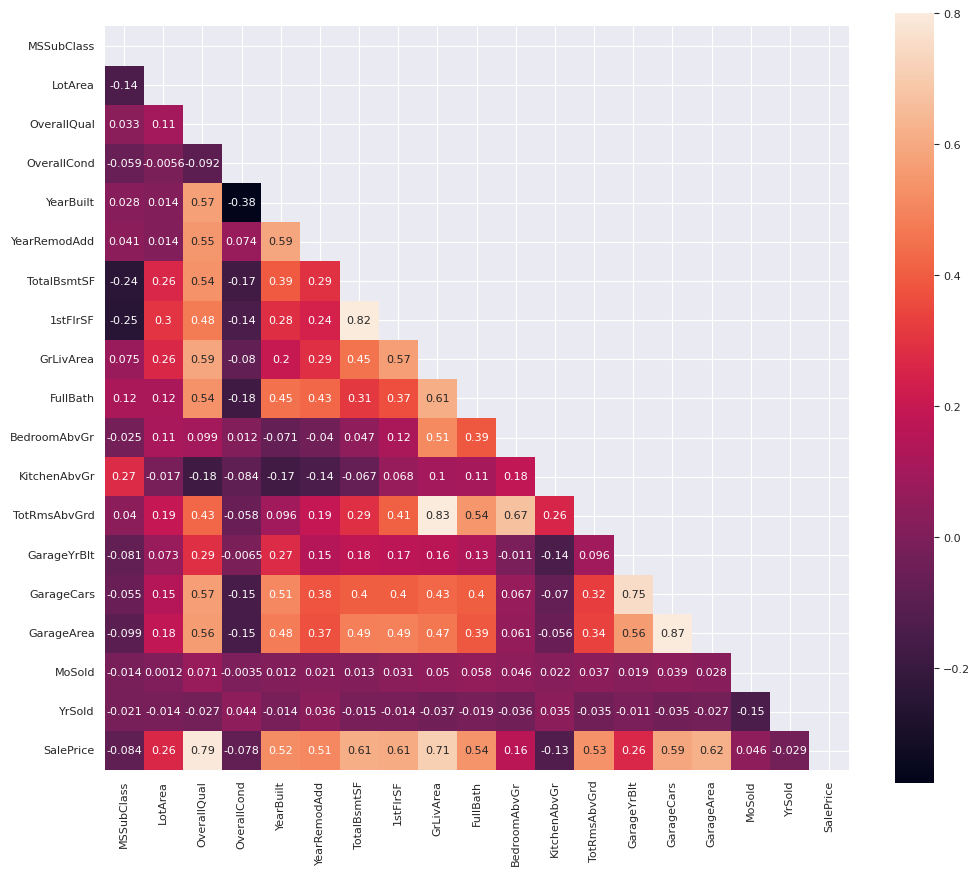

In [144]:
colunas = bdint.drop("Id", axis=1)
colunas = colunas.columns.tolist()
corrmat = bdint[colunas].corr()
fig = plt.figure(figsize = (12, 10))
mask = np.triu(np.ones_like(corrmat, dtype=object))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

## Separando treino e teste

In [24]:
#Inciando os testes, separando em x_treino e y_teste

In [25]:
X = bdint.drop('SalePrice',axis=1)
y = bdint.SalePrice

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## ML Regrerssão Linear

In [28]:
#Regrerssão Linear

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
reg_lin = LinearRegression().fit(X_train, y_train)


In [31]:
y_lin = reg_lin.predict(X_test)

##ML Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
reg_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=6, random_state=10).fit(X_train, y_train)

In [34]:
y_forest = reg_forest.predict(X_test)

In [35]:
reg_forest.score(X_train, y_train)

0.9351198386200134

In [36]:
reg_forest.score(X_test, y_test)

0.8507529326824133

##ML Arvore de Decisão

In [37]:
from sklearn import tree

In [38]:
reg_tree = tree.DecisionTreeRegressor(random_state=10).fit(X_train, y_train)

In [39]:
y_tree = reg_tree.predict(X_test)

## ML Regreção KN

In [40]:
#Regreção KN

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
reg_kn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [43]:
y_kn = reg_kn.predict(X_test)

In [44]:
#Avaliando o modelo utilizando a métrica exigida na competição mean_absolute_error e mean_squared_error

## Avaliação (mean_squared_error)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
print(mean_absolute_error(y_test,y_lin))
print(mean_squared_error(y_test,y_lin))

23917.246014602308
1571842035.627986


In [47]:
print(mean_absolute_error(y_test,y_forest))
print(mean_squared_error(y_test,y_forest))

19853.877045381058
1095681130.5991342


In [48]:
print(mean_absolute_error(y_test,y_tree))
print(mean_squared_error(y_test,y_tree))

28519.414937759335
2163395452.7551866


In [49]:
print(mean_absolute_error(y_test,y_kn))
print(mean_squared_error(y_test,y_kn))

32931.85269709543
2715382774.7852697


In [50]:
#Ao comparar o mean_squared_error, obtivemos o Random Forest como a melhor solução, alcançando a avaliação de 10.

# Projeto 2


In [51]:
import pandas as pd
bdhouse = pd.read_csv('/content/houseprices/train.csv')
#bdhouse = pd.read_csv('/content/houseprices/test.csv')
bdhouse

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Explorando os Dados

In [52]:
bdhouse.shape

(1460, 81)

In [53]:
bdhouse.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [54]:
bdhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
bdhouse.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
#Identificando valores nulos e ordenando
bdhouse.isnull().sum().sort_values(ascending=False).head(50)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [57]:
#identificando valores duplicados
bdhouse.duplicated(keep=False).sum()

0

In [64]:
bdhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

['LotFrontage',
 'OverallQual',
 'PoolArea',
 'LotArea',
 'GarageArea',
 'LowQualFinSF',
 'SalePrice']

## Tratamentos

In [65]:
#Ao verificar que possuia muitos valores zerados, optei por convertelos em nulos
bdhouse.replace(0,np.nan, inplace = True)

In [66]:
#bdHouse2 fizemos a exclusão das colunas onde a quantidade de valores nulos é maior que 100 e para o restantes dos dados nulos substituiremos pelo valor -1(prática utilizada pelos cientista de dados para compreender que o valor era nulo)
bdhouse2 = bdhouse.drop(bdhouse.columns[(bdhouse.isnull().sum()) > 100],axis=1)
bdhouse2 = bdhouse2.fillna(-1)


In [67]:
bdhouse2.shape

(1460, 58)

##Analisando variáveis Numéricas

In [68]:
#Separando os dados numéricos para análisar
bdint = bdhouse2.columns[bdhouse2.dtypes != 'object']
bdint = bdhouse2.loc[:,bdint]
bdint.shape

(1460, 20)

In [69]:
bdint.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1057.404110,1162.626712,1515.463699,1.558904,2.862329,1.045890,6.517808,1868.684247,1.711644,472.924658,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,438.766474,386.587738,525.480383,0.573539,0.832565,0.225097,1.625393,453.925967,0.898404,213.927745,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,-1.000000,334.000000,334.000000,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,-1.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,2.000000,1.000000,5.000000,1958.000000,1.000000,334.500000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,3.000000,1.000000,6.000000,1977.000000,2.000000,480.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,3.000000,1.000000,7.000000,2001.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,8.000000,3.000000,14.000000,2010.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


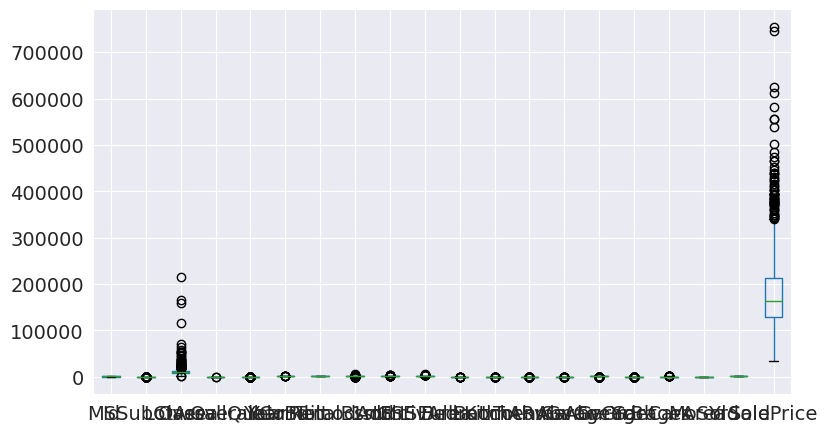

In [70]:
#Ao utilizando a função .describe(), verificamos que na coluna 'LotArea' o 3º Quartil esta com um valor muito descrepante em relação ao valor Maximo, sendo isso indicio de Outlier
boxplot = bdint.boxplot()

In [71]:
import plotly.express as px
boxplot = px.box(bdhouse2, y="LotArea")
boxplot


In [72]:
#Ao analisar as variaves numéricas percebi que a coluna "LotArea", possuia valores discrepantes(outlier) e optei por eliminar do modelo as linhas que continham valores acima de 30.000m
bdhouse2 = bdhouse2.loc[bdhouse2.LotArea <= 30000]
bdhouse2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,548.0,TA,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2.0,460.0,TA,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,608.0,TA,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3.0,642.0,TA,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3.0,836.0,TA,TA,Y,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,460.0,TA,TA,Y,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,500.0,TA,TA,Y,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,252.0,TA,TA,Y,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1.0,240.0,TA,TA,Y,4,2010,WD,Normal,142125


In [73]:
bdhouse2.shape

(1438, 58)

Analisando as váriaveis do tipo categóricas

##Analisando variáveis Categóricas

In [74]:
#Utilizar  biblioteca Matplotlib para visualizar algumas variaveis em gráficos e 'ggplot' como estilo do gráfico
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [75]:
#Separando os dados Categóricos para análisar
bdcat = bdhouse2.columns[bdhouse2.dtypes == 'object']

In [76]:
bdcat = bdhouse2.loc[:,bdcat]


In [77]:
bdcat.shape

(1438, 38)

In [78]:
bdcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1438 non-null   object
 1   Street         1438 non-null   object
 2   LotShape       1438 non-null   object
 3   LandContour    1438 non-null   object
 4   Utilities      1438 non-null   object
 5   LotConfig      1438 non-null   object
 6   LandSlope      1438 non-null   object
 7   Neighborhood   1438 non-null   object
 8   Condition1     1438 non-null   object
 9   Condition2     1438 non-null   object
 10  BldgType       1438 non-null   object
 11  HouseStyle     1438 non-null   object
 12  RoofStyle      1438 non-null   object
 13  RoofMatl       1438 non-null   object
 14  Exterior1st    1438 non-null   object
 15  Exterior2nd    1438 non-null   object
 16  MasVnrType     1438 non-null   object
 17  ExterQual      1438 non-null   object
 18  ExterCond      1438 non-null

## Plotando Gráficos

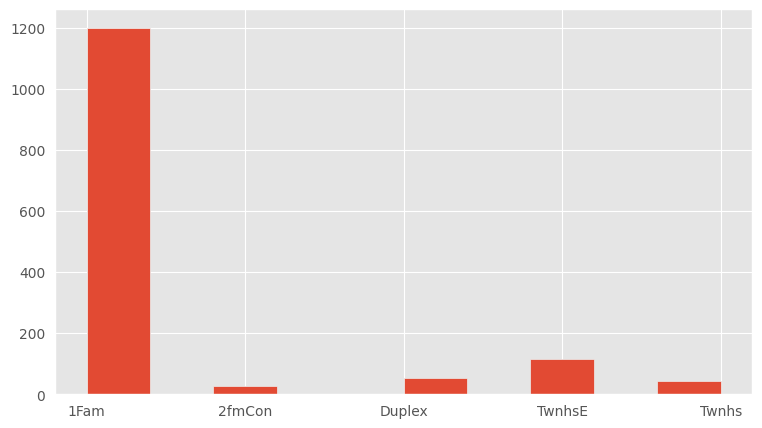

In [79]:
#Ao analisar o tipo de contrução, percebemos que a maioria absoluta é do tipo Unifamiliar
_ = plt.hist(bdcat.BldgType)

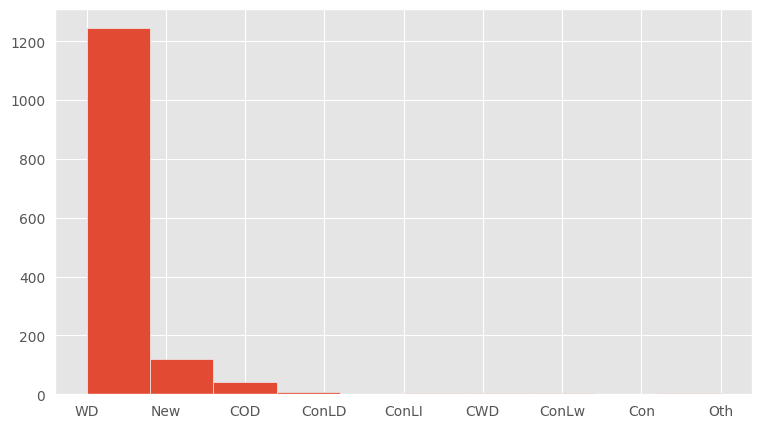

In [80]:
#Ao analisar o tipo de venda, percebemos que a maioria absoluta é do tipo Venda normal com escritura
_ = plt.hist(bdcat.SaleType)


In [81]:
#99% das ruas são asfaltadas
px.pie(bdhouse2, "Street")

Transformar as variaveis Categóricas em Numéricas

## Tratando as variáveis (OneHotEncoder)

In [82]:
#Transformando as variáveis categóricas em numéricas para podermos utilizadas no modelo de ML

In [83]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [84]:
bdh2 = pd.DataFrame.copy(bdhouse2)

In [85]:
bdh2.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,548.0,TA,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2.0,460.0,TA,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,608.0,TA,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3.0,642.0,TA,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3.0,836.0,TA,TA,Y,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2.0,480.0,TA,TA,Y,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,636.0,TA,TA,Y,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2.0,484.0,TA,TA,Y,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,468.0,Fa,TA,Y,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,1.0,205.0,Gd,TA,Y,1,2008,WD,Normal,118000


In [86]:
previsores = bdh2.iloc[:,0:]

In [87]:
previsores = bdh2.drop('SalePrice',axis=1)
previsores = previsores.drop('Id',axis=1)
previsores = previsores.drop('ExterQual',axis=1)
previsores = previsores.drop('BsmtCond',axis=1)
previsores = previsores.drop('BsmtExposure',axis=1)
previsores = previsores.drop('BsmtFinType1',axis=1)
previsores = previsores.drop('BsmtFinType2',axis=1)
previsores = previsores.drop('Electrical',axis=1)
previsores = previsores.drop('GarageType',axis=1)
previsores = previsores.drop('GarageFinish',axis=1)
previsores = previsores.drop('GarageQual',axis=1)
previsores = previsores.drop('GarageCond',axis=1)
previsores = previsores.drop('PavedDrive',axis=1)
previsores = previsores.drop('BsmtQual',axis=1)

previsores = previsores.drop('MasVnrType',axis=1).values
alvo = bdh2.SalePrice.values

In [96]:
previsores

array([[60, 3, 8450, ..., 2008, 8, 4],
       [20, 3, 9600, ..., 2007, 8, 4],
       [60, 3, 11250, ..., 2008, 8, 4],
       ...,
       [70, 3, 9042, ..., 2010, 8, 4],
       [20, 3, 9717, ..., 2010, 8, 4],
       [20, 3, 9937, ..., 2008, 8, 4]], dtype=object)

In [97]:
print(previsores[:10])

[[60 3 8450 1 3 3 0 4 0 5 2 2 0 5 7 5 2003 2003 1 0 12 13 4 2 856.0 1 0 1
  856 1710 2.0 3.0 1.0 2 8 6 2003.0 2.0 548.0 2 2008 8 4]
 [20 3 9600 1 3 3 0 2 0 24 1 2 0 2 6 8 1976 1976 1 0 8 8 4 1 1262.0 1 0 1
  1262 1262 2.0 3.0 1.0 3 6 6 1976.0 2.0 460.0 5 2007 8 4]
 [60 3 11250 1 0 3 0 4 0 5 2 2 0 5 7 5 2001 2002 1 0 12 13 4 2 920.0 1 0
  1 920 1786 2.0 3.0 1.0 2 6 6 2001.0 2.0 608.0 9 2008 8 4]
 [70 3 9550 1 0 3 0 0 0 6 2 2 0 5 7 5 1915 1970 1 0 13 15 4 0 756.0 1 2 1
  961 1717 1.0 3.0 1.0 2 7 6 1998.0 3.0 642.0 2 2006 8 0]
 [60 3 14260 1 0 3 0 2 0 15 2 2 0 5 8 5 2000 2000 1 0 12 13 4 2 1145.0 1
  0 1 1145 2198 2.0 4.0 1.0 2 9 6 2000.0 3.0 836.0 12 2008 8 4]
 [50 3 14115 1 0 3 0 4 0 11 2 2 0 0 5 5 1993 1995 1 0 12 13 4 5 796.0 1 0
  1 796 1362 1.0 1.0 1.0 3 5 6 1993.0 2.0 480.0 10 2009 8 4]
 [20 3 10084 1 3 3 0 4 0 21 2 2 0 2 8 5 2004 2005 1 0 12 13 4 2 1686.0 1
  0 1 1694 1694 2.0 3.0 1.0 2 7 6 2004.0 2.0 636.0 8 2007 8 4]
 [60 3 10382 1 0 3 0 0 0 14 4 2 0 5 7 6 1973 1973 1 0 6 6 4 1 

In [93]:
alvo

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [94]:
#Convertendo de String para Float
previsores[:,1] = LabelEncoder().fit_transform(previsores[:,1])
previsores[:,3] = LabelEncoder().fit_transform(previsores[:,3])
previsores[:,4] = LabelEncoder().fit_transform(previsores[:,4])
previsores[:,5] = LabelEncoder().fit_transform(previsores[:,5])
previsores[:,6] = LabelEncoder().fit_transform(previsores[:,6])
previsores[:,7] = LabelEncoder().fit_transform(previsores[:,7])
previsores[:,8] = LabelEncoder().fit_transform(previsores[:,8])
previsores[:,9] = LabelEncoder().fit_transform(previsores[:,9])
previsores[:,10] = LabelEncoder().fit_transform(previsores[:,10])
previsores[:,11] = LabelEncoder().fit_transform(previsores[:,11])
previsores[:,12] = LabelEncoder().fit_transform(previsores[:,12])
previsores[:,13] = LabelEncoder().fit_transform(previsores[:,13])
previsores[:,18] = LabelEncoder().fit_transform(previsores[:,18])
previsores[:,19] = LabelEncoder().fit_transform(previsores[:,19])
previsores[:,20] = LabelEncoder().fit_transform(previsores[:,20])
previsores[:,21] = LabelEncoder().fit_transform(previsores[:,21])
previsores[:,22] = LabelEncoder().fit_transform(previsores[:,22])
previsores[:,23] = LabelEncoder().fit_transform(previsores[:,23])
previsores[:,25] = LabelEncoder().fit_transform(previsores[:,25])
previsores[:,26] = LabelEncoder().fit_transform(previsores[:,26])
previsores[:,27] = LabelEncoder().fit_transform(previsores[:,27])
previsores[:,33] = LabelEncoder().fit_transform(previsores[:,33])
previsores[:,35] = LabelEncoder().fit_transform(previsores[:,35])
previsores[:,41] = LabelEncoder().fit_transform(previsores[:,41])
previsores[:,42] = LabelEncoder().fit_transform(previsores[:,42])

In [98]:
data_df = pd.DataFrame(previsores)
data_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,60,3,8450,1,3,3,0,4,0,5,...,2,8,6,2003.0,2.0,548.0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,3,6,6,1976.0,2.0,460.0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,...,2,6,6,2001.0,2.0,608.0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,...,2,7,6,1998.0,3.0,642.0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,...,2,9,6,2000.0,3.0,836.0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,60,3,7917,1,3,3,0,4,0,8,...,3,7,6,1999.0,2.0,460.0,8,2007,8,4
1434,20,3,13175,1,3,3,0,4,0,14,...,3,7,2,1978.0,2.0,500.0,2,2010,8,4
1435,70,3,9042,1,3,3,0,4,0,6,...,2,9,6,1941.0,1.0,252.0,5,2010,8,4
1436,20,3,9717,1,3,3,0,4,0,12,...,2,5,6,1950.0,1.0,240.0,4,2010,8,4


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_escalononar = StandardScaler().fit_transform(previsores)


In [ ]:
#Criar um teste com as variaveis escalonadas
previsores_escalononar

array([[ 0.07376261, -0.04587964, -0.31059991, ...,  0.13617763,
         0.31489893,  0.21051882],
       [-0.87754353, -0.04587964, -0.01491682, ..., -0.6169894 ,
         0.31489893,  0.21051882],
       [ 0.07376261, -0.04587964,  0.40932412, ...,  0.13617763,
         0.31489893,  0.21051882],
       ...,
       [ 0.31158914, -0.04587964, -0.1583874 , ...,  1.64251167,
         0.31489893,  0.21051882],
       [-0.87754353, -0.04587964,  0.01516572, ...,  1.64251167,
         0.31489893,  0.21051882],
       [-0.87754353, -0.04587964,  0.07173118, ...,  0.13617763,
         0.31489893,  0.21051882]])

## Separando treino e teste

In [ ]:
#Inciando os testes, separando em x_treino e y_teste

In [ ]:
x = bdint.drop('SalePrice',axis=1)
y = bdint.SalePrice

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Separando os dados para teste e treino, sendo 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(previsores_escalononar, alvo, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(1006, 43)

In [ ]:
X_test.shape

(432, 43)

##ML Regrerssão Linear

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
reg_lin = LinearRegression().fit(X_train, y_train)


In [ ]:
y_lin = reg_lin.predict(X_test)

##ML Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=9, random_state=4).fit(X_train, y_train)

In [ ]:
y_forest = reg_forest.predict(X_test)

In [ ]:
reg_forest.score(X_train, y_train)

0.9740251481085576

In [ ]:
reg_forest.score(X_test, y_test)

0.8409609106196184

## Arvore de Decisão

In [ ]:
from sklearn import tree

In [ ]:
reg_tree = tree.DecisionTreeRegressor(max_depth=6, random_state=10).fit(X_train, y_train)

In [ ]:
reg_tree.score(X_train, y_train)

0.9125256460460794

In [ ]:
reg_tree.score(X_test, y_test)

0.7663820127721005

In [ ]:
y_tree = reg_tree.predict(X_test)

##Regreção KN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg_kn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [ ]:
y_kn = reg_kn.predict(X_test)

In [ ]:
#Avaliando o modelo utilizando a métrica exigida na competição mean_absolute_error e mean_squared_error

##Avaliação (mean_squared_error)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
print(mean_absolute_error(y_test,y_lin))
print(mean_squared_error(y_test,y_lin))

21659.309632621196
1255462063.9090683


In [ ]:
print(mean_absolute_error(y_test,y_forest))
print(mean_squared_error(y_test,y_forest))

19117.37488261259
1209112473.1052806


In [ ]:
print(mean_absolute_error(y_test,y_tree))
print(mean_squared_error(y_test,y_tree))

27208.472560533995
1776106889.1900225


In [ ]:
print(mean_absolute_error(y_test,y_kn))
print(mean_squared_error(y_test,y_kn))

26170.980324074073
1878864369.4982638


In [ ]:
#Neste Projeto 2 conseguimos chegar ao melho resultado de mean_squared_error, utilizando tanto o 'Random Forest' quanto o 'LinearRegression', alcançamos o valor de 12 pontos, sendo esse o melhor modelo comparado com os outros utilizados, neste projeto

In [ ]:
#Diante disso, podemos dizer que o modelo que melhor alcançou um resultado foi o modelo do Projeto 1, utilizando Random Forest

In [ ]:
#Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
kfold = KFold(n_splits=15, shuffle=True, random_state= 5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=6, random_state=10)
resultado = cross_val_score(modelo, previsores, alvo, cv =kfold)

In [ ]:
resultado.mean()

0.7864861111610313

In [ ]:
bdTest = pd.read_csv('/content/houseprices/test.csv')

In [ ]:
bdTest = bdTest.drop(excluir,axis=1)

In [ ]:
bdint2 = bdTest.columns[bdTest.dtypes != 'object']

In [ ]:
bdint2 = bdTest.loc[:,bdint2]

In [ ]:
bdint2 = bdint2.fillna(-1)

In [ ]:
bdint2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [ ]:
#y_pred = reg_lin.predict(bdint2)
#y_pred2 = reg_lin.predict(bdint2)
#y_pred3 =reg_tree.predict(bdint2)
y_pred =reg_forest.predict(bdint2)

In [ ]:
bdint2['SalesPrice'] = y_pred

In [ ]:
teste = bdint2[['Id','SalesPrice']]

In [ ]:
teste.to_csv('resultado.csv',index=False)